# Exercise
Load and preprocess the adult data as before.
Learn a logistic regression model and visualize the coefficients.
Then grid-search the regularization parameter C.

In [1]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
data = pd.read_csv(
    "adult.data", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# this column is somewhat meaningless in this context
data = data.drop("fnlwgt", axis=1)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Take a look at [https://github.com/amueller/aapplied_ml_spring_2017/blob/master/slides/aml-13-adult-census.ipynb](https://github.com/amueller/applied_ml_spring_2017/blob/master/slides/aml-13-adult-census.ipynb) (copied here as [solutions/06-aml-13-adult-census.ipynb](solutions/06-aml-13-adult-census.ipynb) )

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
y = data['income']
X = data.drop('income', axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(X)
# The classification model takes care of the target
#y = pd.get_dummies(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>


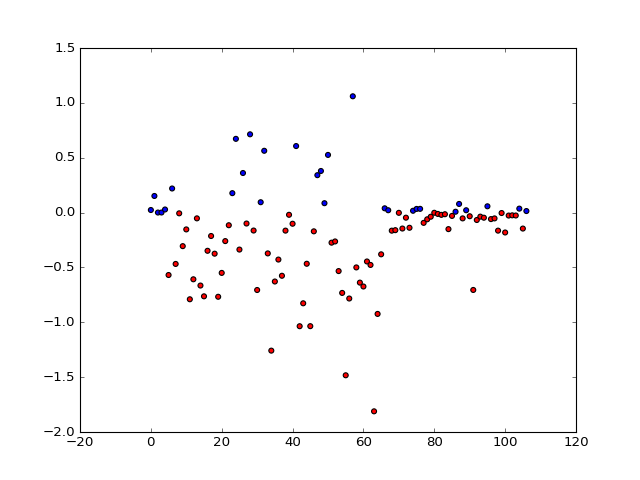

In [5]:
model = LogisticRegression()
model.fit(X, y)

coefs = model.coef_
plt.figure()
plt.scatter(range(X.shape[1]), coefs, c=np.sign(coefs), cmap="bwr_r");

In [6]:
param_grid = {'C': np.logspace(-3, 3, 14)}

gridsearch = GridSearchCV(LogisticRegression(), param_grid)
gridsearch.fit(X_scaled, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [7]:
gridsearch.best_estimator_

LogisticRegression(C=0.20309176209047369, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
gridsearch.best_score_

0.85098737753754494

In [9]:
gridsearch.predict(X_scaled)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'], dtype=object)

<IPython.core.display.Javascript object>


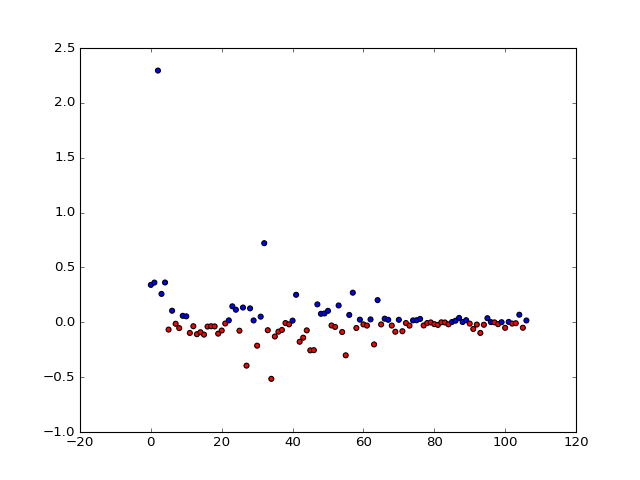

In [10]:
coefs = gridsearch.best_estimator_.coef_
plt.figure()
plt.scatter(range(X_scaled.shape[1]), coefs, c=np.sign(coefs), cmap="bwr_r");

Do it again keeping a test apart

In [11]:
y = data['income']
X = data.drop('income', axis=1)

X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'C': np.logspace(-3, 3, 14)}

gridsearch = GridSearchCV(LogisticRegression(), param_grid)
gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
gridsearch.best_score_

0.84999999999999998

In [14]:
gridsearch.best_estimator_

LogisticRegression(C=0.070170382867038292, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
gridsearch.score(X_test_scaled, y_test)

0.85308930106866476

<IPython.core.display.Javascript object>


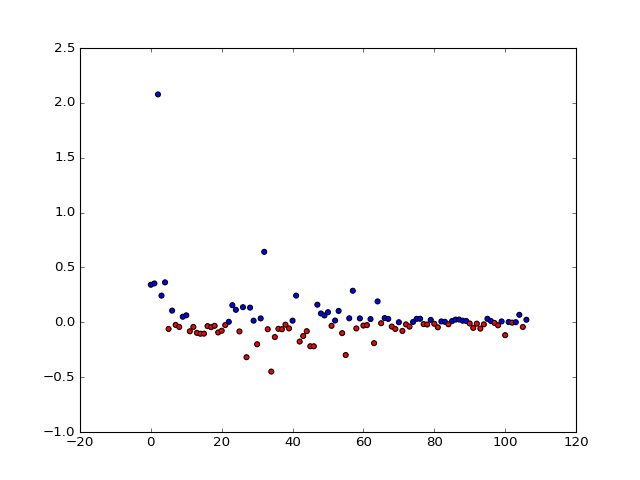

In [16]:
coefs = gridsearch.best_estimator_.coef_
plt.figure()
plt.scatter(range(X_scaled.shape[1]), coefs, c=np.sign(coefs), cmap="bwr_r");